In [1]:
import pandas as pd
import ee
import geemap

# In-situ Data Processing

In [2]:
import pandas as pd

# File paths
file1_path = r'C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\merged_adksurvey84.csv'
file2_path = r'C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\adk_lakes_gt_0.25.csv'

# Read CSV files into DataFrames
df_merged_adksurvey84 = pd.read_csv(file1_path)
df_adk_lakes_gt_025 = pd.read_csv(file2_path)

# Extract the lakes from adk_lakes_gt_0.25.csv file
selected_lakes = df_adk_lakes_gt_025['Permanent_'].tolist()

# Filter df_merged_adksurvey84 based on selected lakes
df = df_merged_adksurvey84[df_merged_adksurvey84['Permanent_'].isin(selected_lakes)]

# Display the resulting DataFrame
df

,No,PONDNO,PONDNAME,DATE,LONG_NAD83DD,LAT_NAD83DD,DOC,TRUCOLOR,Permanent_,MAXDEPTH,MEANDEPTH,SAREA,Lon,Lat
2,2,20042,MUD POND,7/17/84,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
3,2,20042,MUD POND,7/17/84,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
4,3,20055,LAKE KUSHAQUA,7/17/84,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
5,3,20055,LAKE KUSHAQUA,7/17/84,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
8,5,030006A,CHATEAUGAY NARROWS,7/17/84,-74.006536,44.806711,4.5,25.0,132876003,4.3,1.6,73.4,-74.018502,44.819012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1452,50419,GOOSE POND,8/20/87,-73.677906,43.843672,3.3,10.0,89363721,30.5,15.2,26.9,-73.678594,43.841763
1670,1454,50421,CRANE POND,8/20/87,-73.662628,43.851172,3.7,10.0,89363631,32.3,11.6,67.5,-73.652285,43.852613
1671,1455,50424,ROCK POND,8/20/87,-73.598181,43.852006,3.7,5.0,89363595,19.8,6.0,22.7,NaN,NaN
1676,1460,50457,SAND POND,8/20/87,-73.891525,43.948117,5.8,30.0,89362911,12.2,5.0,25.8,-73.900600,43.946440


In [3]:
# Assuming df is your DataFrame
num_unique_permanent = df['Permanent_'].nunique()
print(f'Number of unique values in Permanent_: {num_unique_permanent}')

Number of unique values in Permanent_: 233


In [4]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y')

# Convert datetime back to string with four-digit year
df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')
df

C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\2675672402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y')
C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\2675672402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')


,No,PONDNO,PONDNAME,DATE,LONG_NAD83DD,LAT_NAD83DD,DOC,TRUCOLOR,Permanent_,MAXDEPTH,MEANDEPTH,SAREA,Lon,Lat
2,2,20042,MUD POND,07/17/1984,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
3,2,20042,MUD POND,07/17/1984,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
4,3,20055,LAKE KUSHAQUA,07/17/1984,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
5,3,20055,LAKE KUSHAQUA,07/17/1984,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
8,5,030006A,CHATEAUGAY NARROWS,07/17/1984,-74.006536,44.806711,4.5,25.0,132876003,4.3,1.6,73.4,-74.018502,44.819012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1452,50419,GOOSE POND,08/20/1987,-73.677906,43.843672,3.3,10.0,89363721,30.5,15.2,26.9,-73.678594,43.841763
1670,1454,50421,CRANE POND,08/20/1987,-73.662628,43.851172,3.7,10.0,89363631,32.3,11.6,67.5,-73.652285,43.852613
1671,1455,50424,ROCK POND,08/20/1987,-73.598181,43.852006,3.7,5.0,89363595,19.8,6.0,22.7,NaN,NaN
1676,1460,50457,SAND POND,08/20/1987,-73.891525,43.948117,5.8,30.0,89362911,12.2,5.0,25.8,-73.900600,43.946440


# Landsat 5 L2 (USGS Atmospheric Corrected)

## Landsat 5 L2 Processing for Sample Lakes

In [10]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

# Define a custom filtering function
def filter_function(image):
    # Calculate the percentage of unmasked pixels in the ROI for MNDWI
    unmasked_percentage = image.unmask(0) \
        .reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=lake_point,
            scale=30
        ).get('blue')

    # Calculate the percentage of masked pixels
    masked_percentage = ee.Number(1).subtract(unmasked_percentage)

    # Flag images where more than 50% of the ROI is masked
    is_masked = masked_percentage.lt(0.5)

    # Add a new band indicating whether the image is masked or not
    return image.addBands(ee.Image([is_masked]).rename(['isMasked'])).addBands('blue')



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake_point):
    # Combine reducers with shared inputs
    reducers = ee.Reducer.mean().combine(reducer2=ee.Reducer.stdDev(), sharedInputs=True)
    # Use the combined reducer to get the mean and SD of the image.
    reflectance_values = img.reduceRegion(reducer=reducers, bestEffort=True)
    # Set properties on the image
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the filtered DataFrames for each lake
filtered_dfs = []

# Loop through each lake in the DataFrame
for index, row in df.iterrows():
    # Extract the current lake's information
    pondname = row['PONDNAME']
    date = row['DATE']
    doc = row['DOC']
    trucolor= row['TRUCOLOR']
    
    # Create a 3-day window around the current date
    date_window_start = date - pd.Timedelta(days=7)
    date_window_end = date + pd.Timedelta(days=7)

    # Filter the DataFrame based on the current lake's 2-day window
    filtered_df = df[(df['PONDNAME'] == pondname) & (df['DATE'] >= date_window_start) & (df['DATE'] <= date_window_end)]

    # Create a geometry point for the lake
    lake_point = ee.Geometry.Point(row['LONG_NAD83DD'], row['LAT_NAD83DD']).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filterBounds(lake_point) \
        .filter(ee.Filter.lt('CLOUD_COVER', 50)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES) 
    # \
    #     .map(filter_function) 

        #    .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        # .filter(ee.Filter.calendarRange(1984, 1987, 'year')) \
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_point))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['PONDNAME'] = pondname
    df_reflectance['DOC'] = doc
    df_reflectance['TRUCOLOR'] = trucolor
    
    # Add the DataFrame to the list
    filtered_dfs.append(df_reflectance)

# Concatenate all filtered DataFrames into a single DataFrame
df_filtered_lakes = pd.concat(filtered_dfs, ignore_index=True)

# Sort the DataFrame by 'DATE' in ascending order
df_filtered_lakes.sort_values(by='DATE_SMP', inplace=True)

# Display the resulting DataFrame
df_filtered_lakes

C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\2407589897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])


,DATE_SMP,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,nir_mean,nir_stdDev,red_mean,...,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,PONDNAME,DOC,TRUCOLOR,reflectance
0,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,MUD POND,11.7,90.0,NaN
1,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,MUD POND,11.7,90.0,NaN
2,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,LAKE KUSHAQUA,5.7,35.0,NaN
3,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,LAKE KUSHAQUA,5.7,35.0,NaN
4,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,CHATEAUGAY NARROWS,4.5,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1987-08-20,5445.662924,18.173920,0.033668,0.013986,0.056452,0.019214,0.338090,0.126200,0.041244,...,0.172949,0.070768,0.075718,0.038095,22.252242,2.935052,LEWEY LAKE,4.4,30.0,NaN
188,1987-08-20,5445.662924,18.173920,0.033668,0.013986,0.056452,0.019214,0.338090,0.126200,0.041244,...,0.172949,0.070768,0.075718,0.038095,22.252242,2.935052,FERRIS LAKE,4.0,15.0,NaN
186,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,...,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,PINE LAKE,5.8,20.0,NaN
184,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,...,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,THIRD LAKE,5.6,20.0,NaN


In [11]:
df_filtered_lakes= df_filtered_lakes.drop('reflectance', axis=1)
df_filtered_lakes

,DATE_SMP,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,nir_mean,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,PONDNAME,DOC,TRUCOLOR
0,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,0.023249,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,MUD POND,11.7,90.0
1,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,0.023249,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,MUD POND,11.7,90.0
2,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,0.023249,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,LAKE KUSHAQUA,5.7,35.0
3,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,0.023249,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,LAKE KUSHAQUA,5.7,35.0
4,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,0.023249,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,CHATEAUGAY NARROWS,4.5,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1987-08-20,5445.662924,18.173920,0.033668,0.013986,0.056452,0.019214,0.338090,0.126200,0.041244,0.021762,0.172949,0.070768,0.075718,0.038095,22.252242,2.935052,LEWEY LAKE,4.4,30.0
188,1987-08-20,5445.662924,18.173920,0.033668,0.013986,0.056452,0.019214,0.338090,0.126200,0.041244,0.021762,0.172949,0.070768,0.075718,0.038095,22.252242,2.935052,FERRIS LAKE,4.0,15.0
186,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,0.024611,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,PINE LAKE,5.8,20.0
184,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,0.024611,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,THIRD LAKE,5.6,20.0


## Applied CDOM/DOC Estimation Equations

R^2: 0.007735983166134552
RMSE: 0.44382574206283376


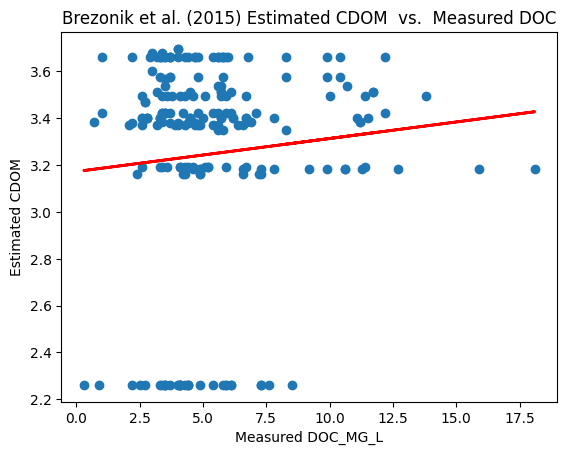

In [17]:
import numpy as np
#--------------------------------------EQUATION---------------------------------------
# Brezonik et al. (2015)

# Coefficients
a1 = 1.441
a2 = -0.841

# Calculate the natural logarithm of B1/B4 ratio
df_filtered_lakes['ln_B1_B4'] = np.log(df_filtered_lakes['blue_mean'] / df_filtered_lakes['nir_mean'])

# Apply the equation to estimate ln(a440)
df_filtered_lakes['ln_a440'] = a1 + a2 * df_filtered_lakes['ln_B1_B4']

# # Convert ln(a440) back to a440 (if needed)
# df_filtered_lakes['a440'] = np.exp(df_filtered_lakes['ln_a440'])

#--------------------------------------PLOT---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_a440'])

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = df_filtered_lakes['DOC'].values.reshape(-1, 1)
y = df_filtered_lakes['ln_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(df_filtered_lakes['DOC'], df_filtered_lakes['ln_a440'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('Estimated CDOM')
plt.title('Brezonik et al. (2015) Estimated CDOM  vs.  Measured DOC')
# plt.ylim(0,100)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


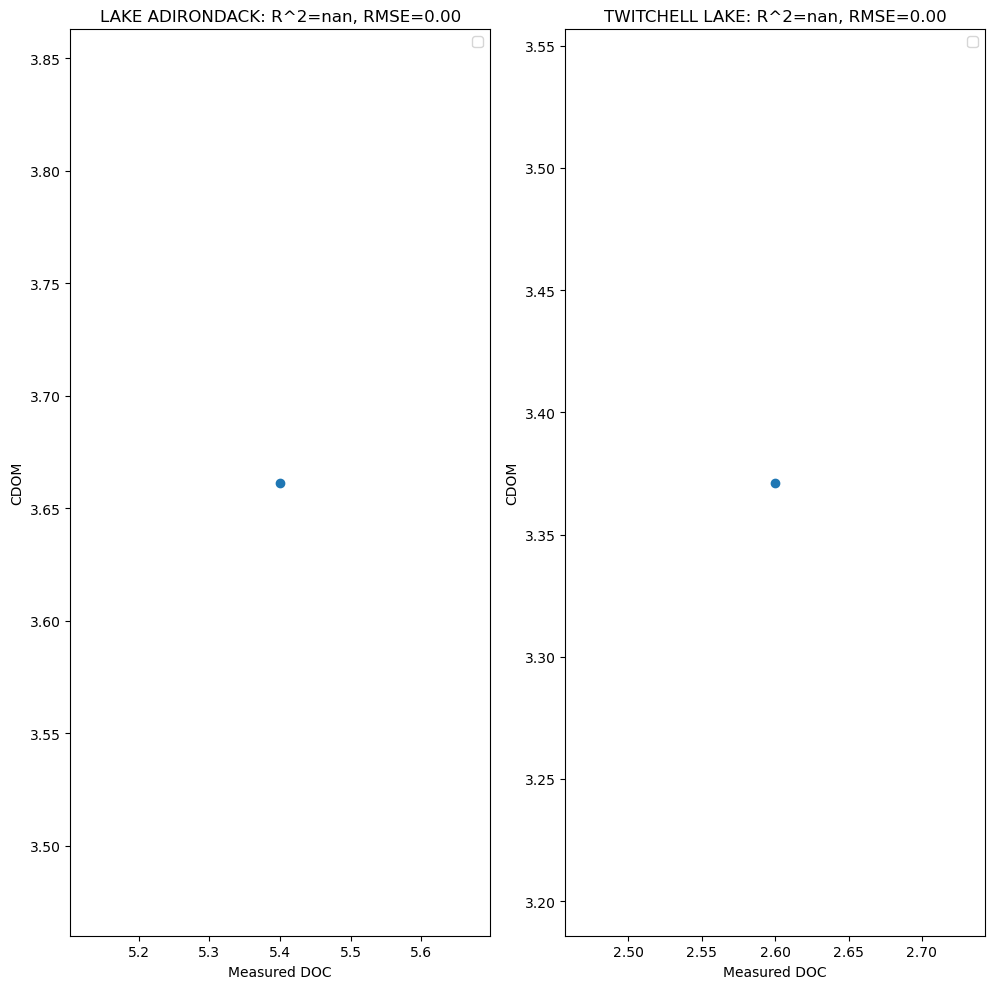

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["LAKE ADIRONDACK", "TWITCHELL LAKE"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = df_filtered_lakes[df_filtered_lakes['PONDNAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 1:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()

## Landsat 5 L2 Machine Learning

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

df_filtered_lakes['DATE_SMP'] = pd.to_datetime(df_filtered_lakes['DATE_SMP'])
df_filtered_lakes.sort_values('DATE_SMP', inplace=True)

# Preparing the training data 
X = df_filtered_lakes[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean', 'blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = df_filtered_lakes['TRUCOLOR']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = df_filtered_lakes.groupby('DOC')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean', 'blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['TRUCOLOR']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 37
Number of columns: 12
*************Predicted Training data (RandomForest)***************
    blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
15   0.028660    0.053429  0.038780  0.330182    0.165769    0.071745   
29   0.023466    0.044464  0.031965  0.328924    0.164558    0.068524   

    blue_stdDev  green_stdDev  red_stdDev  nir_stdDev  swir1_stdDev  \
15     0.009878      0.016042    0.017019    0.097667      0.054852   
29     0.008933      0.013475    0.014211    0.071826      0.042213   

    swir2_stdDev  original_DOC  predicted_DOC  
15      0.030459          40.0           36.7  
29      0.024017          25.0           28.9  
*************Predicted Testing data (RandomForest)***************
   blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
2   0.027896    0.052942  0.040282  0.338374    0.173574    0.078006   

   blue_stdDev  green_stdDev  red_stdDev  nir

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

*************Predicted Training data (XGBoost)***************
    blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
15   0.028660    0.053429  0.038780  0.330182    0.165769    0.071745   
29   0.023466    0.044464  0.031965  0.328924    0.164558    0.068524   

    blue_stdDev  green_stdDev  red_stdDev  nir_stdDev  swir1_stdDev  \
15     0.009878      0.016042    0.017019    0.097667      0.054852   
29     0.008933      0.013475    0.014211    0.071826      0.042213   

    swir2_stdDev  original_DOC  predicted_DOC  
15      0.030459          40.0      39.999016  
29      0.024017          25.0      25.000986  
*************Predicted Testing data (XGBoost)***************
   blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
2   0.027896    0.052942  0.040282  0.338374    0.173574    0.078006   

   blue_stdDev  green_stdDev  red_stdDev  nir_stdDev  swir1_stdDev  \
2     0.011137      0.017353    0.020468     0.09466      0.057122   

   swir2_stdD

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# In-situ Data: Lake Clustering

## K-Means Clustering Method

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
# Assuming your CSV file is named 'lakes.csv' and has a column 'DOC'
data = pd.read_csv(r'C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\merged_adksurvey84.csv')

# Display the first few rows to verify the data
print(data.head())

   No PONDNO       PONDNAME     DATE  LONG_NAD83DD  LAT_NAD83DD   DOC  \
0   1  20039   WHISTLE POND  7/17/84    -73.817367    44.567544   8.5   
1   1  20039   WHISTLE POND  7/17/84    -73.817367    44.567544   8.5   
2   2  20042       MUD POND  7/17/84    -73.913478    44.563381  11.7   
3   2  20042       MUD POND  7/17/84    -73.913478    44.563381  11.7   
4   3  20055  LAKE KUSHAQUA  7/17/84    -74.103206    44.527550   5.7   

   TRUCOLOR Permanent_  MAXDEPTH  MEANDEPTH  SAREA        Lon        Lat  
0      50.0  129690692       3.1        1.3    3.6 -73.817681  44.568648  
1      50.0  129690692       3.1        1.3    3.6 -73.817681  44.568648  
2      90.0  129690712       1.5        0.8   44.1 -73.923746  44.562193  
3      90.0  129690712       1.5        0.8   44.1 -73.923746  44.562193  
4      35.0  129690817      27.7        6.2  152.6 -74.114233  44.517760  


In [20]:
# Check the data types
print(data.dtypes)

# If DOC column is not float, convert it
data['DOC'] = data['DOC'].astype(float)


No                int64
PONDNO           object
PONDNAME         object
DATE             object
LONG_NAD83DD    float64
LAT_NAD83DD     float64
DOC             float64
TRUCOLOR        float64
Permanent_       object
MAXDEPTH        float64
MEANDEPTH       float64
SAREA           float64
Lon             float64
Lat             float64
dtype: object


In [27]:
data = data.dropna(subset=['DOC'])

In [30]:
import os
os.environ['OMP_NUM_THREADS'] = '7'

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

imputer = SimpleImputer(strategy='mean')  # or strategy='median'
data['DOC'] = imputer.fit_transform(data[['DOC']])


C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

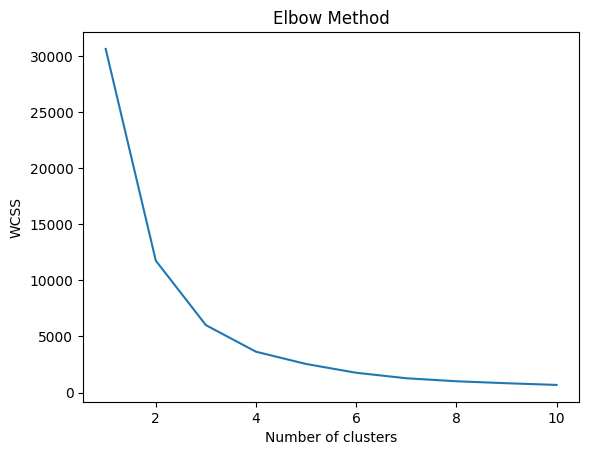

C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


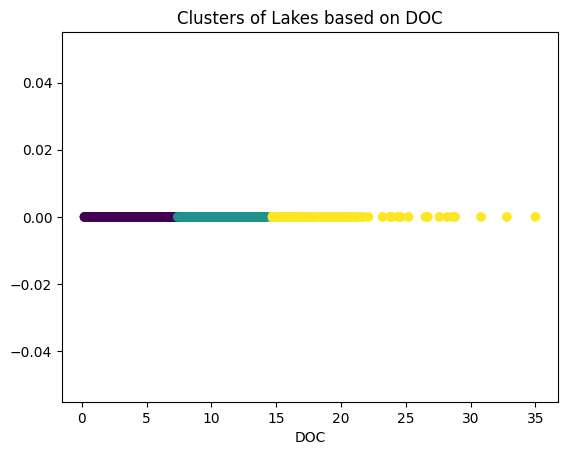

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Convert DOC column to float if necessary
data['DOC'] = data['DOC'].astype(float)

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[['DOC']])
    wcss.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['DOC']])

# Scatter plot of clusters
plt.scatter(data['DOC'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.xlabel('DOC')
plt.title('Clusters of Lakes based on DOC')
plt.show()


C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\3960392757.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MAXDEPTH'] = data['MAXDEPTH'].astype(float)
C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnin

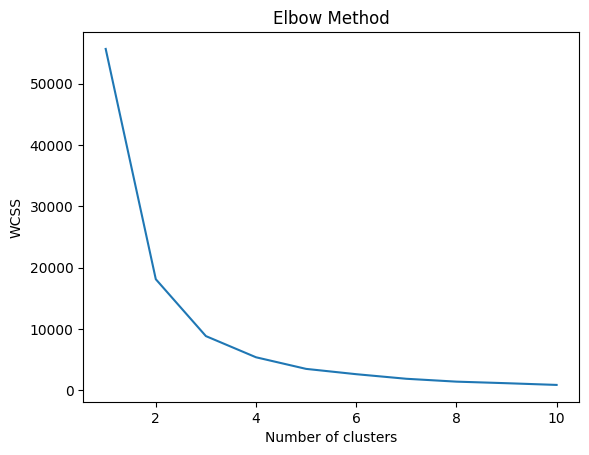

C:\Users\Faculty\miniconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\3960392757.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(data[['MAXDEPTH']])


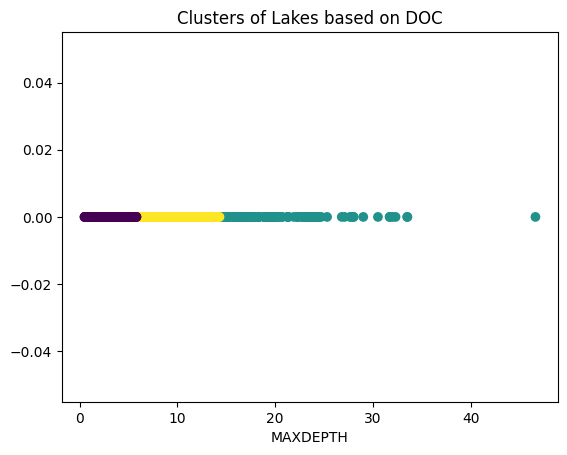

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = data.dropna(subset=['MAXDEPTH'])

# Convert DOC column to float if necessary
data['MAXDEPTH'] = data['MAXDEPTH'].astype(float)

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[['MAXDEPTH']])
    wcss.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['MAXDEPTH']])

# Scatter plot of clusters
plt.scatter(data['MAXDEPTH'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.xlabel('MAXDEPTH')
plt.title('Clusters of Lakes based on DOC')
plt.show()


## Landsat 5 L2 (1213 lakes) with Clustering - 0-7, 7-15, 15+

In [141]:
df = pd.read_csv(r'C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\merged_adksurvey84.csv')
df

,No,PONDNO,PONDNAME,DATE,LONG_NAD83DD,LAT_NAD83DD,DOC,TRUCOLOR,Permanent_,MAXDEPTH,MEANDEPTH,SAREA,Lon,Lat
0,1,20039,WHISTLE POND,7/17/84,-73.817367,44.567544,8.5,50.0,129690692,3.1,1.3,3.6,-73.817681,44.568648
1,1,20039,WHISTLE POND,7/17/84,-73.817367,44.567544,8.5,50.0,129690692,3.1,1.3,3.6,-73.817681,44.568648
2,2,20042,MUD POND,7/17/84,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
3,2,20042,MUD POND,7/17/84,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
4,3,20055,LAKE KUSHAQUA,7/17/84,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1465,50479,BLACK BROOK POND (UPPER),8/21/87,-73.603461,43.967833,7.8,50.0,89362709,5.8,2.9,2.8,-73.601919,43.967250
1682,1466,050421A,UNNAMED POND,8/24/87,-73.640403,43.855617,8.6,40.0,89363549,2.1,1.0,9.1,NaN,NaN
1683,1467,50452,MUD POND,8/24/87,-73.563736,43.972833,8.5,30.0,89362641,1.5,1.0,2.7,NaN,NaN
1684,1468,50464,BASS LAKE,8/24/87,-73.677075,43.973667,6.0,15.0,89362629,9.8,5.0,15.7,-73.679423,43.975632


In [142]:
# Filter lakes with SAREA > 15
df = df[df['SAREA'] > 15]

In [143]:
# Assuming df is your DataFrame
num_unique_permanent = df['Permanent_'].nunique()
print(f'Number of unique values in Permanent_: {num_unique_permanent}')

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y')

# Convert datetime back to string with four-digit year
df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')

df

Number of unique values in Permanent_: 333


C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\1101318004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y')
C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\1101318004.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')


,No,PONDNO,PONDNAME,DATE,LONG_NAD83DD,LAT_NAD83DD,DOC,TRUCOLOR,Permanent_,MAXDEPTH,MEANDEPTH,SAREA,Lon,Lat
2,2,20042,MUD POND,07/17/1984,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
3,2,20042,MUD POND,07/17/1984,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
4,3,20055,LAKE KUSHAQUA,07/17/1984,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
5,3,20055,LAKE KUSHAQUA,07/17/1984,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
8,5,030006A,CHATEAUGAY NARROWS,07/17/1984,-74.006536,44.806711,4.5,25.0,132876003,4.3,1.6,73.4,-74.018502,44.819012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1455,50424,ROCK POND,08/20/1987,-73.598181,43.852006,3.7,5.0,89363595,19.8,6.0,22.7,NaN,NaN
1676,1460,50457,SAND POND,08/20/1987,-73.891525,43.948117,5.8,30.0,89362911,12.2,5.0,25.8,-73.900600,43.946440
1677,1461,50557,STONY POND,08/20/1987,-73.985136,43.838675,5.9,20.0,89363785,7.3,2.2,23.7,-73.980448,43.837227
1678,1462,50567,OK SLIP POND,08/20/1987,-74.121253,43.800619,10.6,30.0,89364113,14.3,3.5,15.1,-74.127536,43.801652


In [144]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

# Define a custom filtering function
def filter_function(image):
    # Calculate the percentage of unmasked pixels in the ROI for MNDWI
    unmasked_percentage = image.unmask(0) \
        .reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=lake_point,
            scale=30
        ).get('blue')

    # Calculate the percentage of masked pixels
    masked_percentage = ee.Number(1).subtract(unmasked_percentage)

    # Flag images where more than 50% of the ROI is masked
    is_masked = masked_percentage.lt(0.5)

    # Add a new band indicating whether the image is masked or not
    return image.addBands(ee.Image([is_masked]).rename(['isMasked'])).addBands('blue')



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake_point):
    # Combine reducers with shared inputs
    reducers = ee.Reducer.mean().combine(reducer2=ee.Reducer.stdDev(), sharedInputs=True)
    # Use the combined reducer to get the mean and SD of the image.
    reflectance_values = img.reduceRegion(reducer=reducers, bestEffort=True)
    # Set properties on the image
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the filtered DataFrames for each lake
filtered_dfs = []

# Loop through each lake in the DataFrame
for index, row in df.iterrows():
    # Extract the current lake's information
    pondname = row['PONDNAME']
    date = row['DATE']
    doc = row['DOC']
    trucolor= row['TRUCOLOR']
    
    # Create a 3-day window around the current date
    date_window_start = date - pd.Timedelta(days=7)
    date_window_end = date + pd.Timedelta(days=7)

    # Filter the DataFrame based on the current lake's 2-day window
    filtered_df = df[(df['PONDNAME'] == pondname) & (df['DATE'] >= date_window_start) & (df['DATE'] <= date_window_end)]

    # Create a geometry point for the lake
    lake_point = ee.Geometry.Point(row['LONG_NAD83DD'], row['LAT_NAD83DD']).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filterBounds(lake_point) \
        .filter(ee.Filter.lt('CLOUD_COVER', 50)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES) 
    # \
    #     .map(filter_function) 

        #    .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        # .filter(ee.Filter.calendarRange(1984, 1987, 'year')) \
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_point))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['PONDNAME'] = pondname
    df_reflectance['DOC'] = doc
    df_reflectance['TRUCOLOR'] = trucolor
    
    # Add the DataFrame to the list
    filtered_dfs.append(df_reflectance)

# Concatenate all filtered DataFrames into a single DataFrame
df_filtered_lakes = pd.concat(filtered_dfs, ignore_index=True)

# Sort the DataFrame by 'DATE' in ascending order
df_filtered_lakes.sort_values(by='DATE_SMP', inplace=True)

# Display the resulting DataFrame
df_filtered_lakes

C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\2407589897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])


,DATE_SMP,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,nir_mean,nir_stdDev,red_mean,...,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,PONDNAME,DOC,TRUCOLOR,reflectance
0,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,MUD POND,11.7,90.0,NaN
1,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,MUD POND,11.7,90.0,NaN
2,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,LAKE KUSHAQUA,5.7,35.0,NaN
3,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,LAKE KUSHAQUA,5.7,35.0,NaN
4,1984-07-10,5442.160920,11.560326,0.029575,0.012883,0.055266,0.018939,0.346846,0.089360,0.044330,...,0.175398,0.055211,0.083268,0.040965,28.515655,4.894534,CHATEAUGAY NARROWS,4.5,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,...,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,PINE LAKE,5.8,20.0,NaN
308,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,...,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,THIRD LAKE,5.6,20.0,NaN
306,1987-08-20,5443.060538,13.661032,0.033685,0.015482,0.056334,0.021336,0.325862,0.103022,0.044750,...,0.181874,0.068122,0.083317,0.041398,23.115538,3.902260,FIRST LAKE ESSEX CHAIN,6.0,25.0,NaN
327,1987-08-20,5445.662924,18.173920,0.033668,0.013986,0.056452,0.019214,0.338090,0.126200,0.041244,...,0.172949,0.070768,0.075718,0.038095,22.252242,2.935052,WILMURT LAKE,4.7,10.0,NaN


R^2: 0.007184080787429936
RMSE: 0.45628170909851684


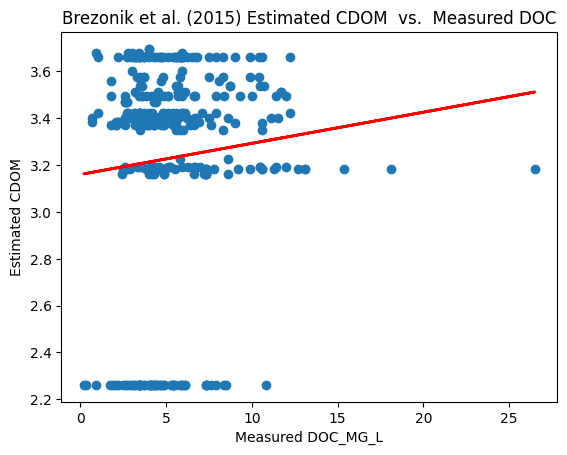

In [145]:
import numpy as np
#--------------------------------------EQUATION---------------------------------------
# Brezonik et al. (2015)

# Coefficients
a1 = 1.441
a2 = -0.841

# Calculate the natural logarithm of B1/B4 ratio
df_filtered_lakes['ln_B1_B4'] = np.log(df_filtered_lakes['blue_mean'] / df_filtered_lakes['nir_mean'])

# Apply the equation to estimate ln(a440)
df_filtered_lakes['ln_a440'] = a1 + a2 * df_filtered_lakes['ln_B1_B4']

# # Convert ln(a440) back to a440 (if needed)
# df_filtered_lakes['a440'] = np.exp(df_filtered_lakes['ln_a440'])

#--------------------------------------PLOT---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_a440'])

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = df_filtered_lakes['DOC'].values.reshape(-1, 1)
y = df_filtered_lakes['ln_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(df_filtered_lakes['DOC'], df_filtered_lakes['ln_a440'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('Estimated CDOM')
plt.title('Brezonik et al. (2015) Estimated CDOM  vs.  Measured DOC')
# plt.ylim(0,100)
plt.show()


C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\1965107206.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_lakes['ln_B1_B4'] = np.log(df_filtered_lakes['blue_mean'] / df_filtered_lakes['nir_mean'])
C:\Users\Faculty\AppData\Local\Temp\ipykernel_26236\1965107206.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_lakes['ln_a440'] = a1 + a2 * df_filtered_lakes['ln_B1_B4']


Range 0 - 7 | R^2: 0.01 | RMSE: 0.47
Range 7 - 15 | R^2: 0.06 | RMSE: 0.39
Range 15 - inf | R^2: 0.00 | RMSE: 0.00


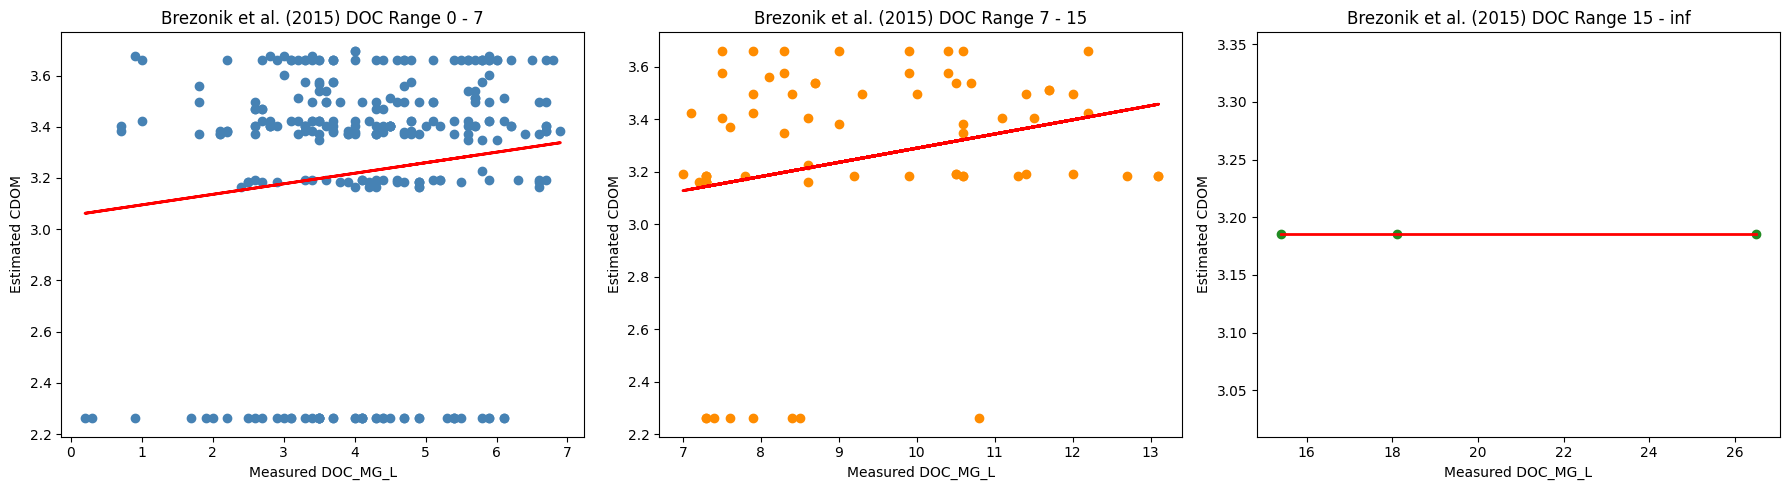

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Brezonik et al. (2015)

# Coefficients
a1 = 1.441
a2 = -0.841

# Calculate the natural logarithm of B1/B4 ratio
df_filtered_lakes['ln_B1_B4'] = np.log(df_filtered_lakes['blue_mean'] / df_filtered_lakes['nir_mean'])

# Apply the equation to estimate ln(a440)
df_filtered_lakes['ln_a440'] = a1 + a2 * df_filtered_lakes['ln_B1_B4']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_a440'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['ln_a440'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['ln_a440'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")


        ax.set_title(f'Brezonik et al. (2015) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.02 | RMSE: 0.13
Range 7 - 15 | R^2: 0.02 | RMSE: 0.12
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


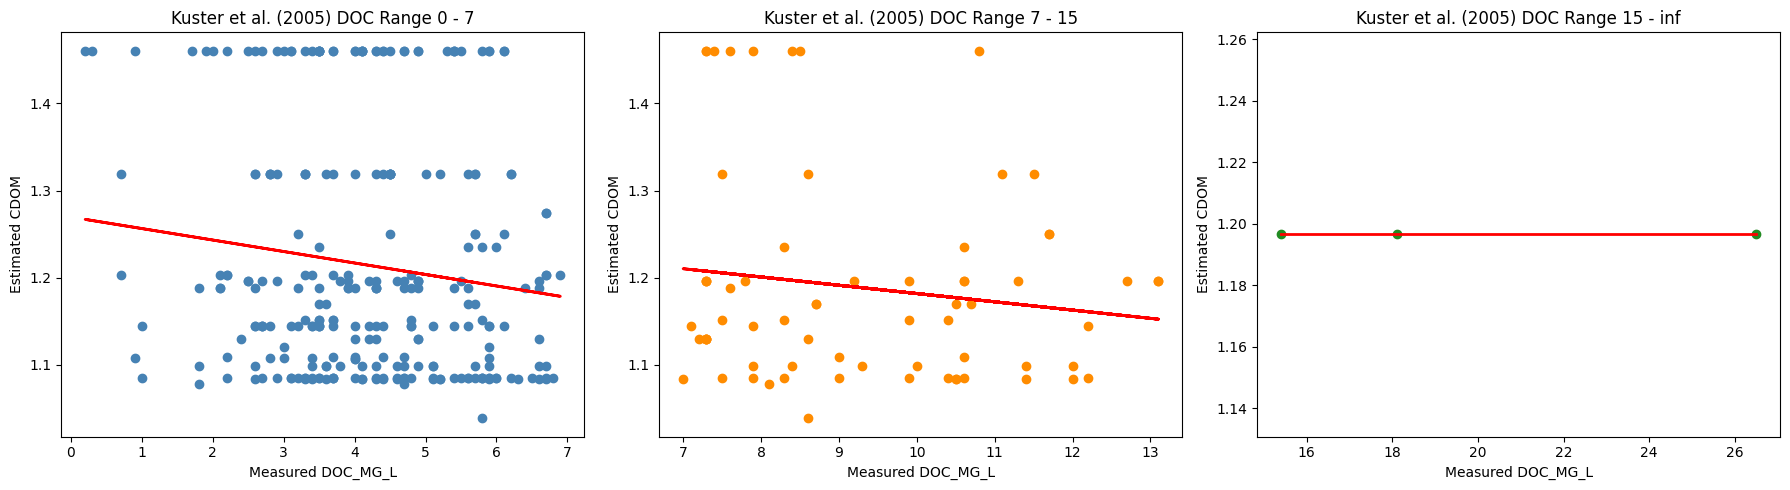

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Kuster et al. (2005)

# Constants for the equation
a1 = 1.582
a2 = -1.507

# Calculate the natural logarithm of B2/B3 ratio
df_filtered_lakes['ln_B2_B3'] = np.log(df_filtered_lakes['green_mean'] / df_filtered_lakes['red_mean'])

# Apply the equation to estimate ln(a440)
df_filtered_lakes['ln_a440'] = a1 + a2 * df_filtered_lakes['ln_B2_B3']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_a440'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['ln_a440'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['ln_a440'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Kuster et al. (2005) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.02 | RMSE: 0.05
Range 7 - 15 | R^2: 0.05 | RMSE: 0.04
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


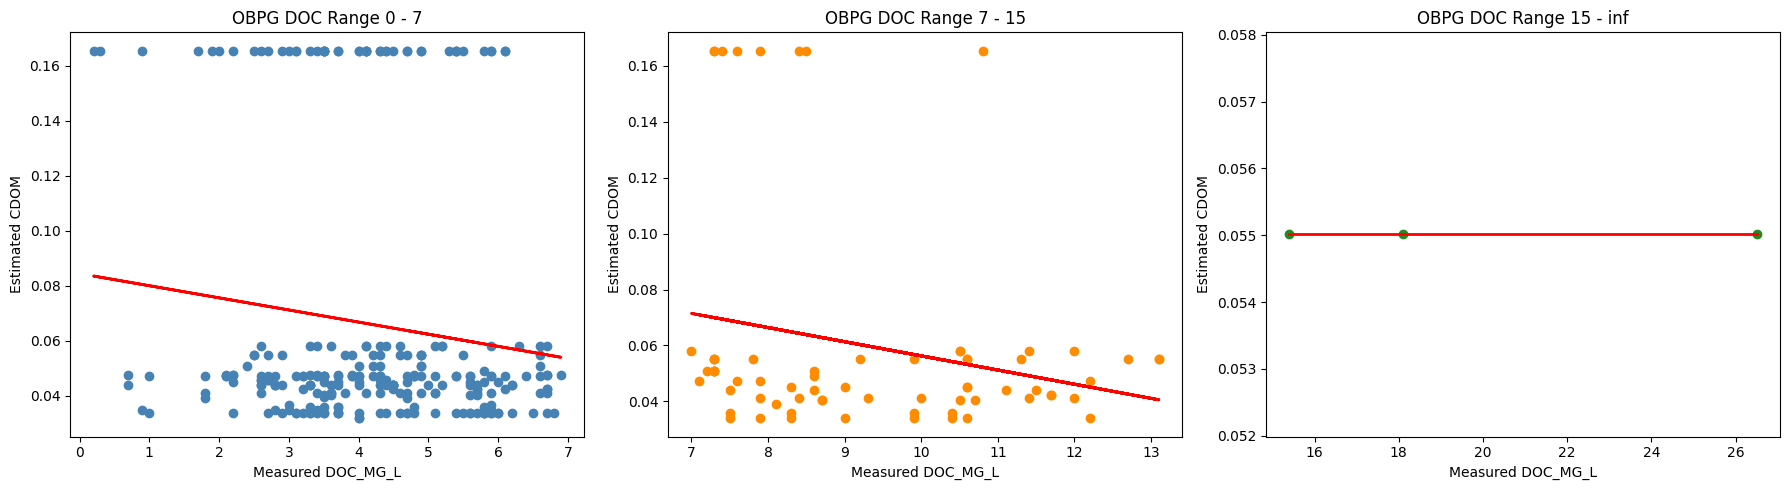

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# NASA Ocean Biology Processing Group (OBPG) Algorithm

# Constants for the equation
a1 = 0.5

# Calculate the sum of Rrs(443) and Rrs(490)
df_filtered_lakes['sum_Rrs_443_490'] = df_filtered_lakes['blue_mean'] + df_filtered_lakes['green_mean']

# Apply the equation to estimate CDOM
df_filtered_lakes['CDOM'] = a1 * df_filtered_lakes['sum_Rrs_443_490']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'CDOM'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['CDOM'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['CDOM'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'OBPG DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.02 | RMSE: 0.49
Range 7 - 15 | R^2: 0.07 | RMSE: 0.40
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


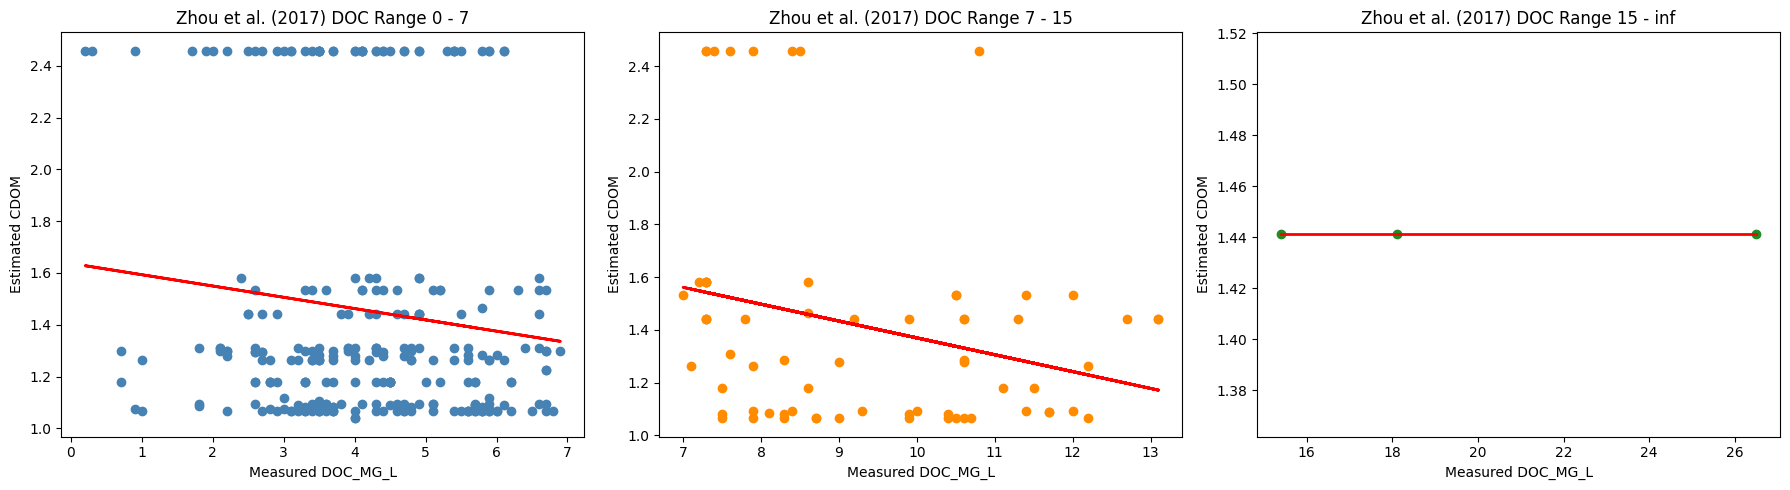

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Zhou et al. (2017)

# Constants for the equation
a1 = 2.75
a2 = 1.48

# Calculate the ratio Rrs(445)/Rrs(555)
df_filtered_lakes['ratio_Rrs_445_555'] = df_filtered_lakes['blue_mean'] / df_filtered_lakes['green_mean']

# Apply the equation to estimate CDOM
df_filtered_lakes['CDOM'] = a1 * (df_filtered_lakes['ratio_Rrs_445_555'] ** a2)

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'CDOM'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['CDOM'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['CDOM'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Zhou et al. (2017) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.01 | RMSE: 0.71
Range 7 - 15 | R^2: 0.07 | RMSE: 0.60
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


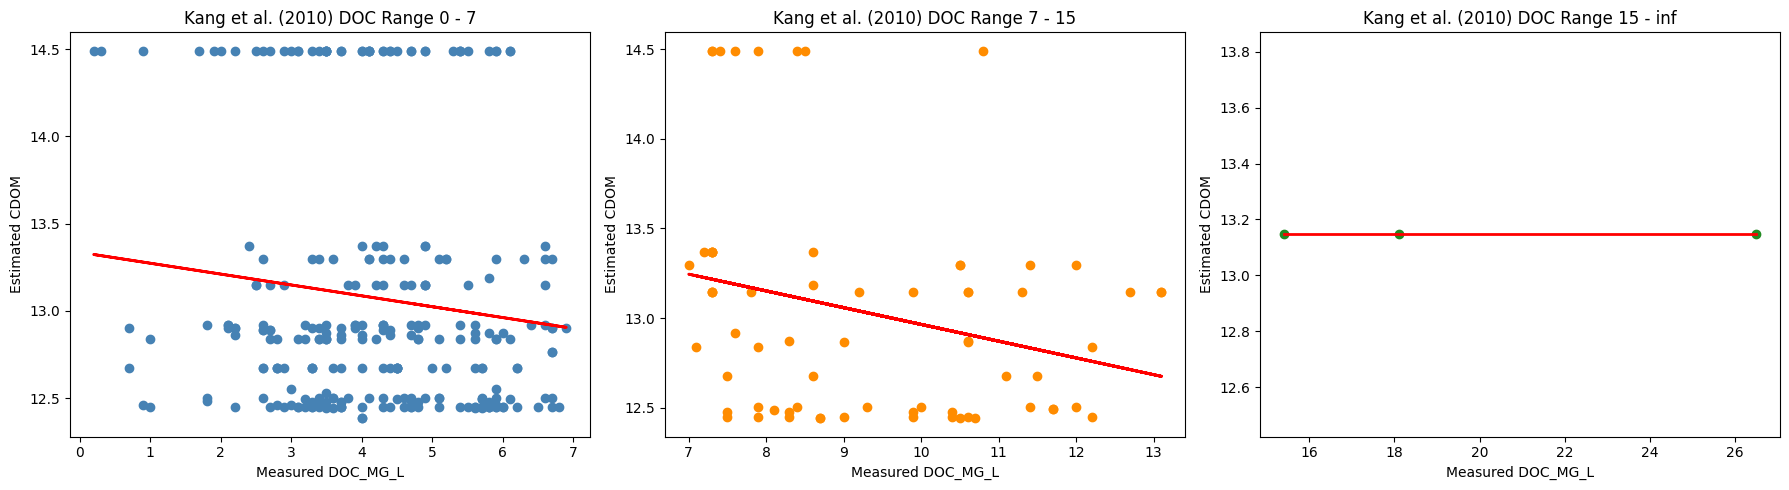

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Kang et al. (2010)

# Constants for the equation
a1 = 10**1.17
a2 = -0.27

# Calculate the ratio Rrs(555)/Rrs(443)
df_filtered_lakes['ratio_Rrs_555_443'] = df_filtered_lakes['green_mean'] / df_filtered_lakes['blue_mean']

# Apply the equation to estimate CDOM
df_filtered_lakes['CDOM'] = a1 * (df_filtered_lakes['ratio_Rrs_555_443'] ** a2)

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'CDOM'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['CDOM'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['CDOM'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Kang et al. (2010) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.02 | RMSE: 1.74
Range 7 - 15 | R^2: 0.03 | RMSE: 1.48
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


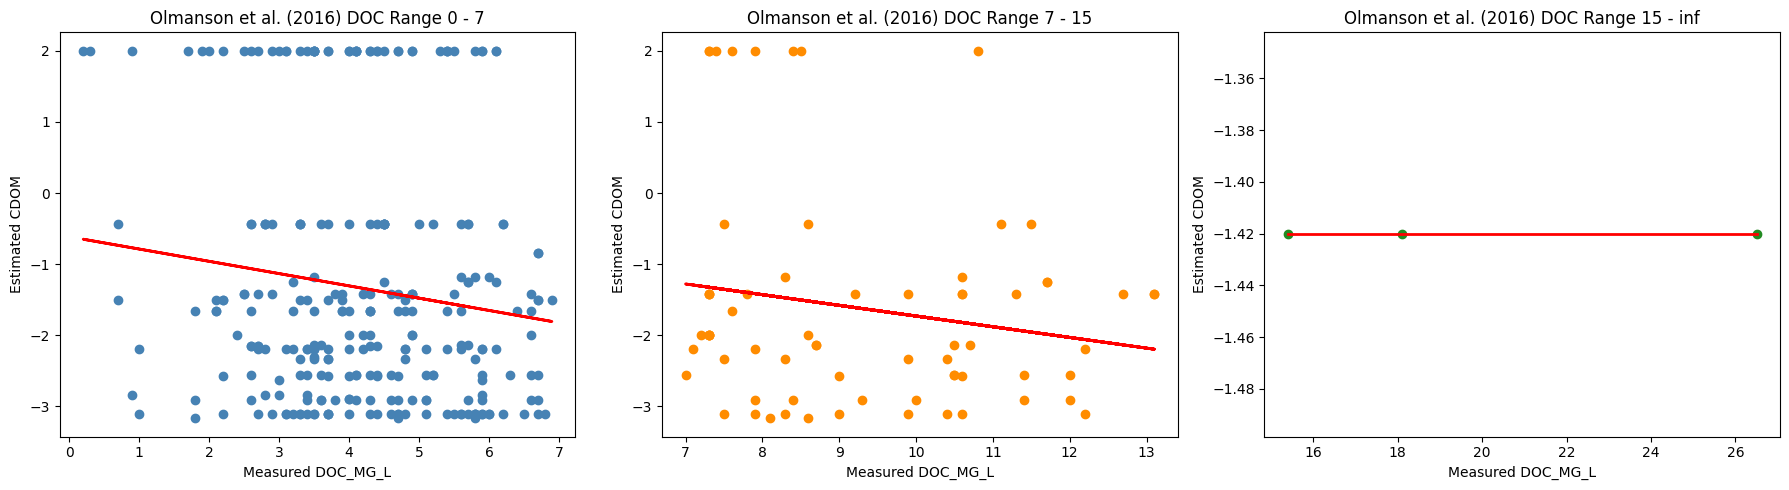

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Olmanson et al. (2016)

# Constants for the equation
a1 = 14.62
a2 = 2.77
a3 = -14.21

# Calculate B1/B3 and B2/B3 ratios
df_filtered_lakes['ratio_B1_B3'] = df_filtered_lakes['blue_mean'] / df_filtered_lakes['red_mean']
df_filtered_lakes['ratio_B2_B3'] = df_filtered_lakes['green_mean'] / df_filtered_lakes['red_mean']

# Apply the equation to estimate ln(a440)
df_filtered_lakes['ln_a440'] = a1 + a2 * df_filtered_lakes['ratio_B1_B3'] + a3 * df_filtered_lakes['ratio_B2_B3']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_a440'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['ln_a440'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['ln_a440'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Olmanson et al. (2016) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.01 | RMSE: 20.32
Range 7 - 15 | R^2: 0.04 | RMSE: 17.46
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


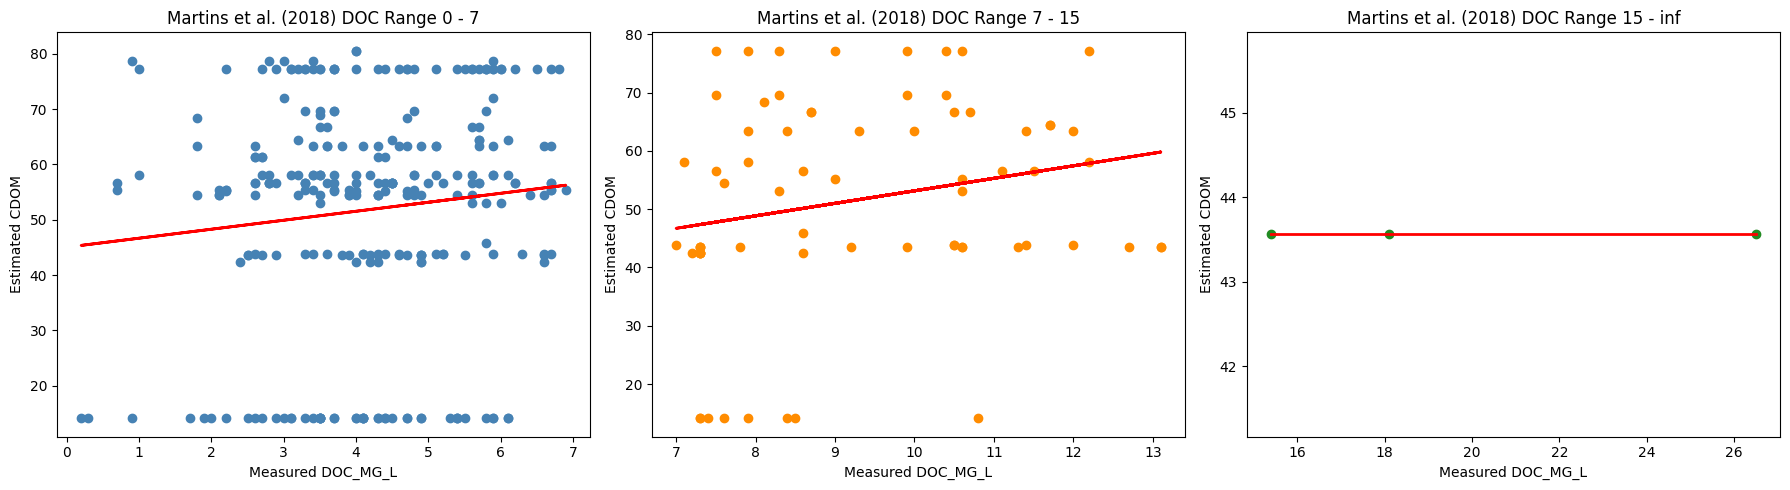

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Martins et al. (2018)

# Constants for the equation
a1 = -0.5986
a2 = 5.5510

# Calculate B4/B1 ratio
df_filtered_lakes['ratio_B4_B1'] = df_filtered_lakes['nir_mean'] / df_filtered_lakes['blue_mean']

# Apply the equation to estimate aCDOM(485)
df_filtered_lakes['aCDOM_485'] = a1 + a2 * df_filtered_lakes['ratio_B4_B1']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'aCDOM_485'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['aCDOM_485'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['aCDOM_485'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Martins et al. (2018) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()


Range 0 - 7 | R^2: 0.01 | RMSE: 2.82
Range 7 - 15 | R^2: 0.04 | RMSE: 2.31
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


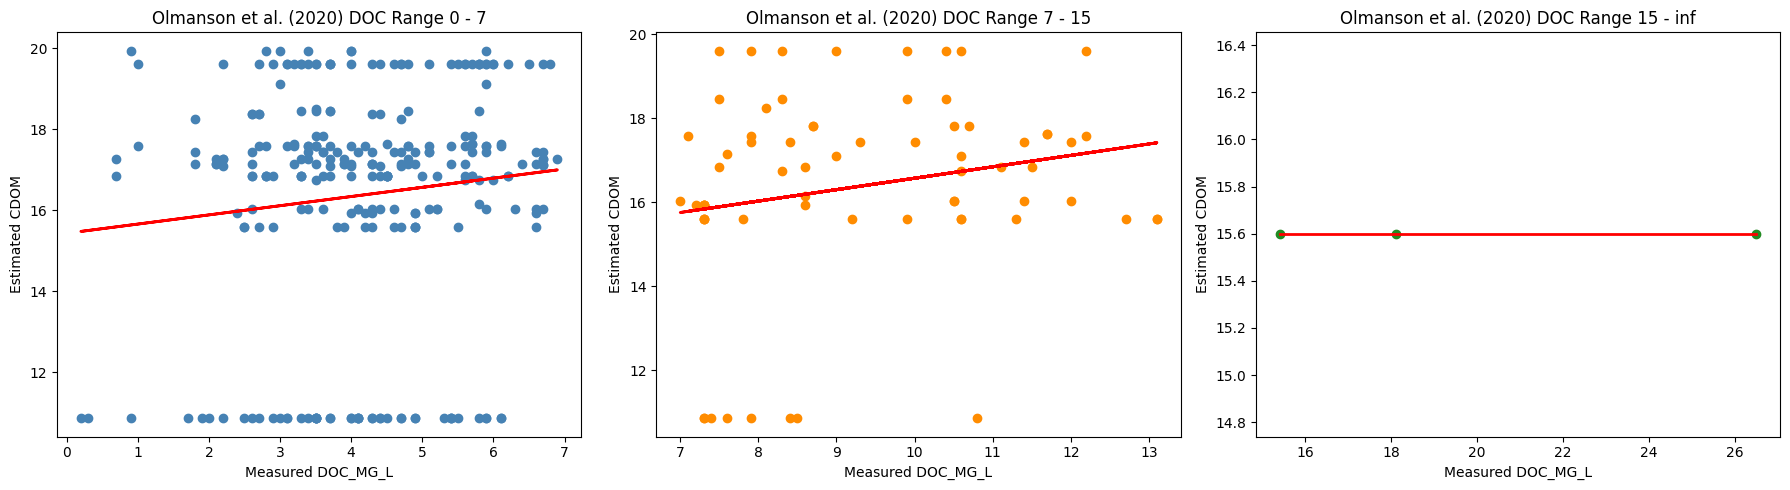

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Olmanson et al. (2020)

# Constants for the equation
a1 = 0.42
a2 = 1.79
a3 = 6.07

# Calculate the ratios Rrs(B3)/Rrs(B2) and Rrs(B4)/Rrs(B2)
df_filtered_lakes['ratio_Rrs_B3_B2'] = df_filtered_lakes['red_mean'] / df_filtered_lakes['green_mean']
df_filtered_lakes['ratio_Rrs_B4_B2'] = df_filtered_lakes['nir_mean'] / df_filtered_lakes['green_mean']

# Apply the equation to estimate ln(a440)
df_filtered_lakes['ln_a440'] = a1 * df_filtered_lakes['ratio_Rrs_B3_B2'] + a2 * df_filtered_lakes['ratio_Rrs_B4_B2'] + a3

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_a440'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['ln_a440'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['ln_a440'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Olmanson et al. (2020) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()

Range 0 - 7 | R^2: 0.00 | RMSE: 0.14
Range 7 - 15 | R^2: 0.02 | RMSE: 0.14
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


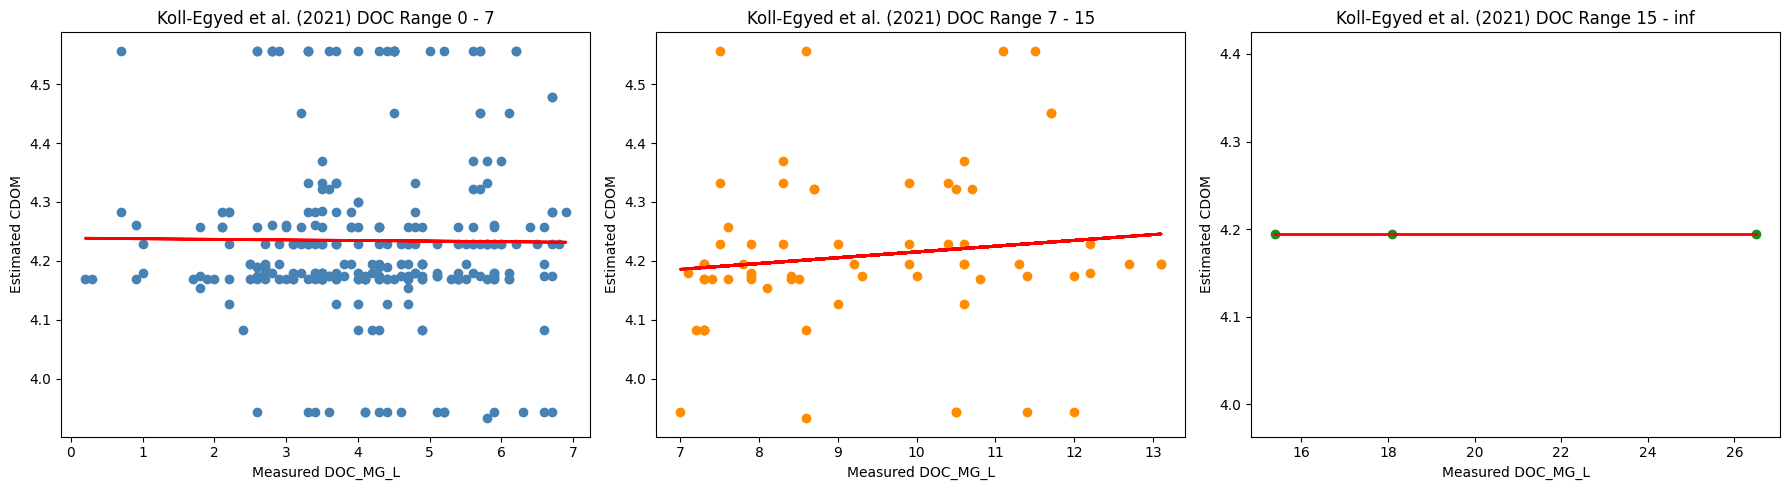

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Koll-Egyed et al. (2021)

# Constants for the equation
a1 = 3.65
a2 = 2.91
a3 = 0.41

# Calculate the natural logarithms
df_filtered_lakes['ln_B2_B3'] = np.log(df_filtered_lakes['green_mean'] / df_filtered_lakes['red_mean'])
df_filtered_lakes['ln_B1'] = np.log(df_filtered_lakes['blue_mean'])

# Apply the equation to estimate ln(CDOM(a440))
df_filtered_lakes['ln_CDOM_a440'] = a1 - a2 * df_filtered_lakes['ln_B2_B3'] - a3 * df_filtered_lakes['ln_B1']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ln_CDOM_a440'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['ln_CDOM_a440'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['ln_CDOM_a440'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Koll-Egyed et al. (2021) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()

Range 0 - 7 | R^2: 0.01 | RMSE: 2.61
Range 7 - 15 | R^2: 0.06 | RMSE: 2.30
Range 15 - inf | R^2: 0.00 | RMSE: 0.00


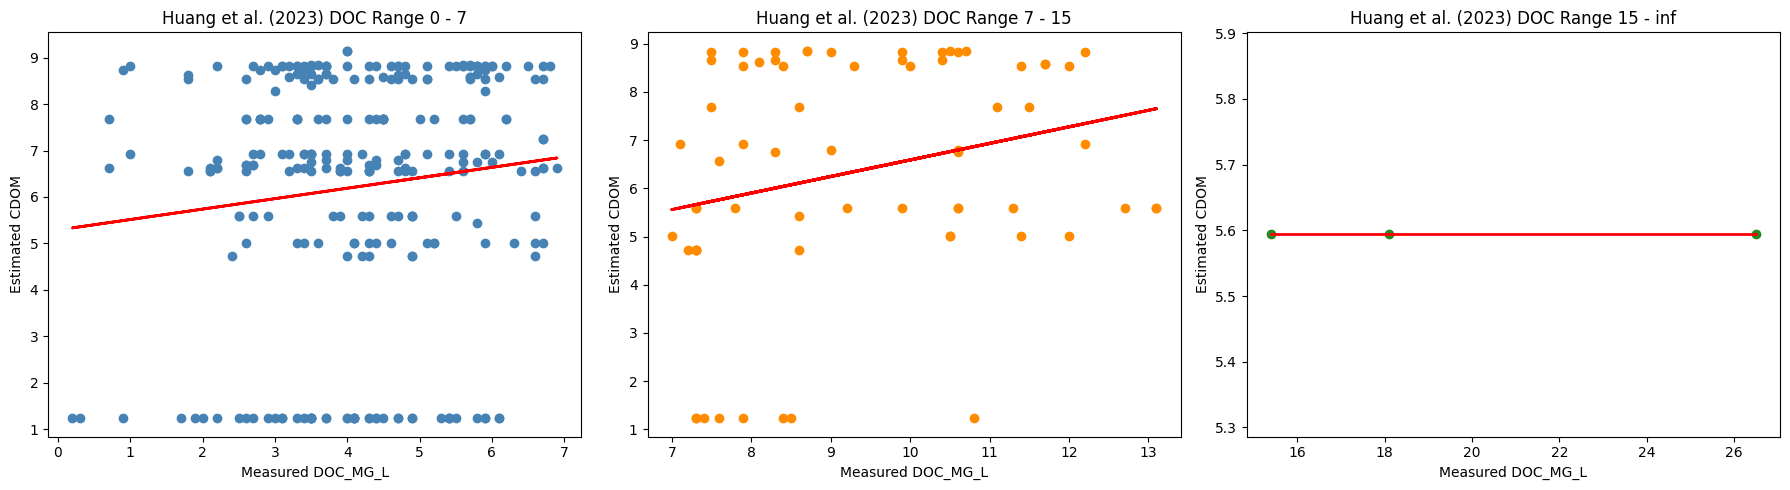

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# Huang et al. (2023)

# Constants for the equation
a1 = 9.302
a2 = -8.801

# Calculate B2/B1 ratio
df_filtered_lakes['ratio_B2_B1'] = df_filtered_lakes['green_mean'] / df_filtered_lakes['blue_mean']

# Apply the equation to estimate ag(290)
df_filtered_lakes['ag_290'] = a1 * df_filtered_lakes['ratio_B2_B1'] + a2

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'ag_290'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['ag_290'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['ag_290'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'Huang et al. (2023) DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()

Range 0 - 7 | R^2: 0.02 | RMSE: 1.61
Range 7 - 15 | R^2: 0.07 | RMSE: 1.34
Range 15 - inf | R^2: 1.00 | RMSE: 0.00


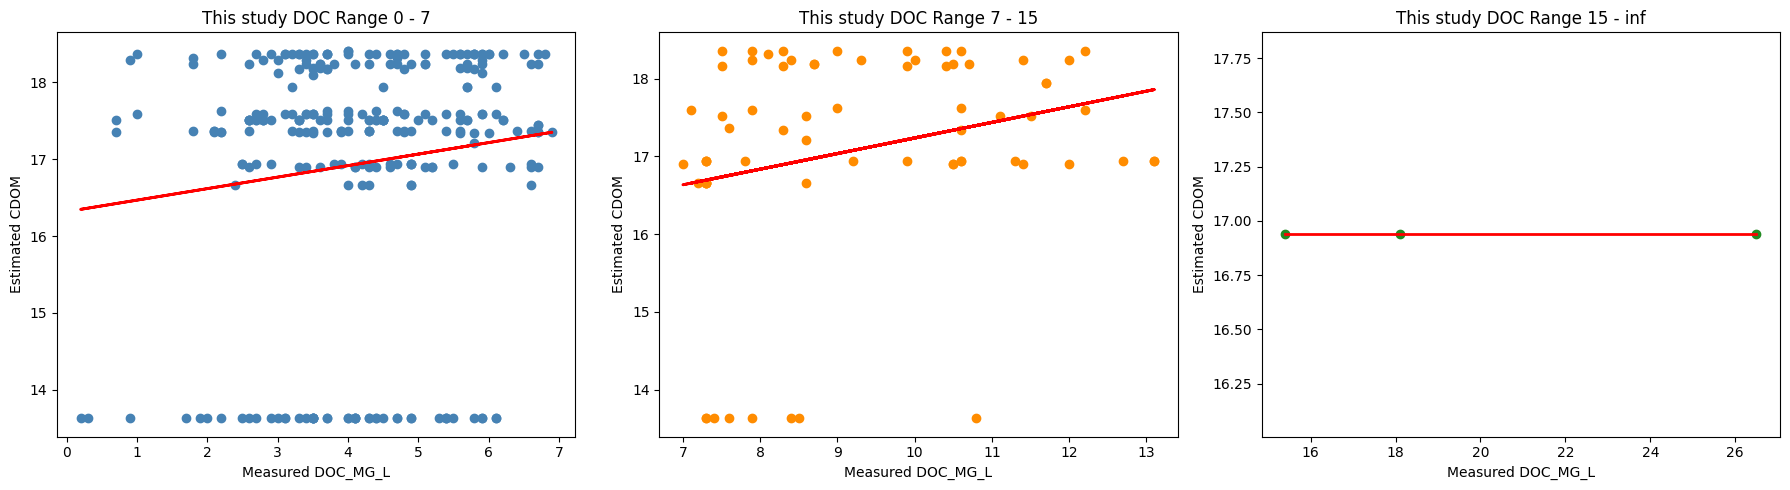

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#--------------------------------------EQUATION---------------------------------------
# This study (previous Landsat 8 and Sentinel-2 equation)

# Constants for the equation
a1 = 20.3
a2 = 10
a3 = 2.4

# Calculate B1/B2 and B2/B3 ratios
df_filtered_lakes['ratio_B1_B2'] = df_filtered_lakes['blue_mean'] / df_filtered_lakes['green_mean']
df_filtered_lakes['ratio_B2_B3'] = df_filtered_lakes['green_mean'] / df_filtered_lakes['red_mean']

# Apply the equation to estimate CDOM
df_filtered_lakes['CDOM'] = a1 - a2 * df_filtered_lakes['ratio_B1_B2'] + a3 * df_filtered_lakes['ratio_B2_B3']

#--------------------------------------PLOT---------------------------------------

# Drop rows with missing values in 'DOC' and 'ln_a440'
df_filtered_lakes = df_filtered_lakes.dropna(subset=['DOC', 'CDOM'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define the DOC ranges and colors
doc_ranges = [(0, 7), (7, 15), (15, np.inf)]
colors = ['steelblue', 'darkorange', 'forestgreen']

# Plot each range in a separate subplot
for i, (low, high) in enumerate(doc_ranges):
    ax = axes[i]
    subset = df_filtered_lakes[(df_filtered_lakes['DOC'] >= low) & (df_filtered_lakes['DOC'] < high)]

    if not subset.empty:
        # Linear regression
        X = subset['DOC'].values.reshape(-1, 1)
        y = subset['CDOM'].values
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_pred = regression_model.predict(X)

        # Plot data points
        ax.scatter(subset['DOC'], subset['CDOM'], color=colors[i])

        # Plot regression line
        ax.plot(X, y_pred, color='red', linewidth=2)

        # Calculate R^2 and RMSE
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Print R^2 and RMSE
        print(f"Range {low} - {high} | R^2: {r2:.2f} | RMSE: {rmse:.2f}")

        ax.set_title(f'This study DOC Range {low} - {high}')
        ax.set_xlabel('Measured DOC_MG_L')
        ax.set_ylabel('Estimated CDOM')

plt.tight_layout()
plt.show()

# Finding Large Lakes

In [124]:
import pandas as pd

# Specify the path to your Excel file
file_path = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LTM_Data_2023_3_9.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

df

,SITE_ID,PROGRAM_ID,DATE_SMP,month,SAMPLE_LOCATION,SAMPLE_TYPE,WATERBODY_TYPE,SAMPLE_DEPTH,TIME_SMP,ANC_UEQ_L,...,N_TD_UEQ_L,PH_EQ,PH_FLD,PH_LAB,PH_STVL,P_TL_UEQ_L,SECCHI_M,SIO2_MG_L,SO4_UEQ_L,WTEMP_DEG_C
0,040850,LTM_ME,1997-09-22,9.0,EPI,Annual,Lake,NaN,NaN,21.4,...,300.0,6.40,NaN,6.27,6.13,7.3,NaN,0.28,96.0,NaN
1,1E1-060,LTM_ME,2007-07-15,7.0,EPI,Regular,Lake,NaN,NaN,82.9,...,100.0,6.85,NaN,6.85,7.07,NaN,NaN,0.19,23.8,NaN
2,1E1-131,LTM_ME,1984-04-27,4.0,EPI,Regular,Lake,NaN,NaN,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN
3,1E1-131,LTM_ME,1987-07-13,7.0,EPI,Regular,Lake,NaN,NaN,16.9,...,NaN,6.23,NaN,NaN,5.87,NaN,NaN,0.64,51.0,NaN
4,1E1-131,LTM_ME,2003-11-18,11.0,EPI,Regular,Lake,NaN,NaN,12.0,...,NaN,6.17,NaN,5.84,5.80,NaN,NaN,NaN,51.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38916,WWW,LTM_PA,1988-11-06,NaN,Stream,Regular,Stream,NaN,NaN,79.4,...,NaN,NaN,6.70,NaN,NaN,NaN,NaN,3.62,206.2,NaN
38917,WWW,LTM_PA,1989-03-22,NaN,Stream,Regular,Stream,NaN,NaN,9.9,...,NaN,NaN,6.00,NaN,NaN,NaN,NaN,4.20,214.2,NaN
38918,WWW,LTM_PA,1989-06-25,NaN,Stream,Regular,Stream,NaN,NaN,4.2,...,NaN,NaN,6.27,NaN,NaN,NaN,NaN,4.40,189.6,NaN
38919,WWW,LTM_PA,1990-02-13,NaN,Stream,Regular,Stream,NaN,NaN,12.7,...,NaN,NaN,5.99,NaN,NaN,NaN,NaN,4.30,202.9,NaN


In [125]:
# Find the number of unique values in the "SITE_ID" column
num_unique_site_ids = df['SITE_ID'].nunique()
print(f'Number of unique SITE_IDs: {num_unique_site_ids}')

Number of unique SITE_IDs: 169


In [128]:
# Filter the DataFrame for rows where PROGRAM_ID is "LTM_ALTM"
filtered_df = df[df['PROGRAM_ID'] == "LTM_ALTM"]

# Find the unique values in the "SITE_ID" column of the filtered DataFrame
unique_site_ids = filtered_df['SITE_ID'].unique()
num_unique_site_ids = len(unique_site_ids)

# Print the number of unique SITE_IDs
print(f'Number of unique SITE_IDs for PROGRAM_ID "LTM_ALTM": {num_unique_site_ids}')

# Print the unique SITE_IDs
print("Unique SITE_IDs:")
for site_id in unique_site_ids:
    print(site_id)

Number of unique SITE_IDs for PROGRAM_ID "LTM_ALTM": 59
Unique SITE_IDs:
1A1-052
1A1-102
1A1-103
1A1-106
1A1-107
1A1-109
1A1-110
1A2-077
020058
020059
020138
020188
020197
020265
030171
030172
030255
040186
040210
040576
040704
040707
040826
040850
040852
040874
040887
041007
04253630
04253635
04253639
04253660
04253712
04253740
050215
050649
050669
050706
050707
060182
060315A
070728
070859
1A1-017
1A1-029
1A1-059
1A1-071
1A1-087
1A1-089
1A1-105
1A1-111
1A1-112
1A2-028
1A2-066
1A2-076
1A2-078
1A3-001
1A3-048
1A3-065


In [127]:
filtered_df

,SITE_ID,PROGRAM_ID,DATE_SMP,month,SAMPLE_LOCATION,SAMPLE_TYPE,WATERBODY_TYPE,SAMPLE_DEPTH,TIME_SMP,ANC_UEQ_L,...,N_TD_UEQ_L,PH_EQ,PH_FLD,PH_LAB,PH_STVL,P_TL_UEQ_L,SECCHI_M,SIO2_MG_L,SO4_UEQ_L,WTEMP_DEG_C
86,1A1-052,LTM_ALTM,1989-10-01,10.0,OUT,Regular,Lake,NaN,NaN,106.600000,...,NaN,NaN,6.85,NaN,NaN,NaN,NaN,3.110000,131.300000,14.0
87,1A1-102,LTM_ALTM,1982-12-13,12.0,OUT,Regular,Lake,NaN,NaN,53.900000,...,NaN,NaN,6.47,NaN,NaN,NaN,NaN,2.300000,115.600000,1.0
88,1A1-102,LTM_ALTM,1983-07-25,7.0,OUT,Regular,Lake,NaN,NaN,52.800000,...,NaN,NaN,6.72,NaN,NaN,NaN,NaN,1.900000,101.600000,22.5
89,1A1-102,LTM_ALTM,1983-10-03,10.0,OUT,Regular,Lake,NaN,NaN,57.700000,...,NaN,NaN,6.69,NaN,NaN,NaN,NaN,1.000000,101.200000,18.0
90,1A1-102,LTM_ALTM,1986-06-18,6.0,OUT,Regular,Lake,NaN,NaN,34.100000,...,NaN,NaN,6.13,NaN,NaN,NaN,NaN,1.630000,93.200000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38345,1A1-017,LTM_ALTM,2020-06-02,6.0,EPI,Regular,Lake,0.0,09:58,6.134637,...,NaN,5.884793,NaN,5.422120,NaN,4.0,NaN,2.169910,43.967999,NaN
38346,1A1-103,LTM_ALTM,2019-11-14,11.0,EPI,Regular,Lake,0.0,11:55,15.492793,...,NaN,6.335538,NaN,5.855766,NaN,8.0,NaN,3.104901,36.130600,NaN
38347,1A1-109,LTM_ALTM,2019-11-14,11.0,EPI,Regular,Lake,NaN,12:40,92.131844,...,NaN,7.088696,NaN,6.454683,NaN,6.0,NaN,5.723907,45.251400,NaN
38348,030172,LTM_ALTM,2021-02-04,2.0,EPI,Regular,Lake,0.5,11:40,54.831570,...,NaN,6.891678,NaN,6.115917,NaN,NaN,NaN,0.172435,4.799400,NaN


In [129]:
# Specify the path to your CSV file
file_path = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\merged_adksurvey84.csv"

# Read the CSV file
adk_df = pd.read_csv(file_path)

# Filter the DataFrame for rows where SAREA is greater than 15
adk_df = adk_df[adk_df['SAREA'] > 15]

adk_df

,No,PONDNO,PONDNAME,DATE,LONG_NAD83DD,LAT_NAD83DD,DOC,TRUCOLOR,Permanent_,MAXDEPTH,MEANDEPTH,SAREA,Lon,Lat
2,2,20042,MUD POND,7/17/84,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
3,2,20042,MUD POND,7/17/84,-73.913478,44.563381,11.7,90.0,129690712,1.5,0.8,44.1,-73.923746,44.562193
4,3,20055,LAKE KUSHAQUA,7/17/84,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
5,3,20055,LAKE KUSHAQUA,7/17/84,-74.103206,44.527550,5.7,35.0,129690817,27.7,6.2,152.6,-74.114233,44.517760
8,5,030006A,CHATEAUGAY NARROWS,7/17/84,-74.006536,44.806711,4.5,25.0,132876003,4.3,1.6,73.4,-74.018502,44.819012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1455,50424,ROCK POND,8/20/87,-73.598181,43.852006,3.7,5.0,89363595,19.8,6.0,22.7,NaN,NaN
1676,1460,50457,SAND POND,8/20/87,-73.891525,43.948117,5.8,30.0,89362911,12.2,5.0,25.8,-73.900600,43.946440
1677,1461,50557,STONY POND,8/20/87,-73.985136,43.838675,5.9,20.0,89363785,7.3,2.2,23.7,-73.980448,43.837227
1678,1462,50567,OK SLIP POND,8/20/87,-74.121253,43.800619,10.6,30.0,89364113,14.3,3.5,15.1,-74.127536,43.801652


In [130]:
import pandas as pd

# Path to the Excel file
excel_file_path = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LTM_Data_2023_3_9.xlsx"

# Path to the CSV file
csv_file_path = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\merged_adksurvey84.csv"

# Read the Excel file to get unique SITE_IDs where PROGRAM_ID is 'LTM_ALTM'
df_excel = pd.read_excel(excel_file_path)
unique_site_ids = df_excel[df_excel['PROGRAM_ID'] == 'LTM_ALTM']['SITE_ID'].unique()

# Read the CSV file
df_csv = pd.read_csv(csv_file_path)

# Filter the CSV DataFrame for rows where PONDNO is in unique_site_ids
filtered_df = df_csv[df_csv['PONDNO'].isin(unique_site_ids)]

# Print the filtered DataFrame
filtered_df

,No,PONDNO,PONDNAME,DATE,LONG_NAD83DD,LAT_NAD83DD,DOC,TRUCOLOR,Permanent_,MAXDEPTH,MEANDEPTH,SAREA,Lon,Lat
569,450,060315A,RAQUETTE LAKE RESERVOIR,7/11/85,-74.651,43.795064,7.1,50.0,132437600,3.0,1.6,1.5,-74.651653,43.793209
